In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df=pd.read_excel(io='sales_rep.xlsx',sheet_name='sales_data_sample')
df2=pd.read_excel(io='sales_rep.xlsx',sheet_name='Sales_rep',)

In [3]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10223,37,100.0,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium
1,10309,41,100.0,5,4394.38,10/15/2004 0:00,Shipped,Motorcycles,95,S10_1678,Baane Mini Imports,Stavern,4110,Norway,Medium


In [4]:
df2.head(2)

,SALES_REP_ID,Name,First Name,Last Name,Gender,Photo Img
0,1,Harmani Calderoni,Harmani,Calderoni,M,https://images.pexels.com/photos/91227/pexels-...
1,2,Singleton Ashton,Singleton,Ashton,M,https://images.pexels.com/photos/718261/pexels...


In [5]:
df=df.iloc[:,0:].merge(df2.iloc[:,:2],left_on='ORDERLINENUMBER',right_on='SALES_REP_ID')

In [6]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni
2,10210,34,100.00,1,6123.40,2004-12-01 00:00:00,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
3,10377,50,100.00,1,5182.00,2005-09-02 00:00:00,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,1,Harmani Calderoni
4,10419,37,100.00,1,5202.94,5/17/2005 0:00,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,1,Harmani Calderoni
5,10405,55,100.00,1,8289.05,4/14/2005 0:00,Shipped,Classic Cars,169,S18_3232,Mini Caravy,Strasbourg,67000,France,Large,1,Harmani Calderoni
6,10392,36,100.00,1,4035.96,2005-10-03 00:00:00,Shipped,Vintage Cars,99,S18_3320,Mini Auto Werke,Graz,8010,Austria,Medium,1,Harmani Calderoni
7,10240,37,100.00,1,5959.22,4/13/2004 0:00,Shipped,Classic Cars,141,S18_3685,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
8,10105,50,79.67,1,3983.50,2003-11-02 00:00:00,Shipped,Vintage Cars,83,S24_3816,Danish Wholesale Imports,Kobenhavn,1734,Denmark,Medium,1,Harmani Calderoni
9,10317,35,83.32,1,2916.20,2004-02-11 00:00:00,Shipped,Planes,72,S24_4278,Technics Stores Inc.,Burlingame,94217,USA,Small,1,Harmani Calderoni


In [7]:
print(df.shape)
df.info()

(2823, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  POSTALCODE       2747 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
 15  SALES_REP_ID     2823 non-null   int64  
 16  Name             2823 non-null   object 
dtypes: 

### The Data Structure
The data comprise 2823 rows and 17 columns (features). 6 of these 17 columns (35.3%) are numeric variables

The DEALSIZE is the only ordered factor variable (Small->Medium->Large)

The rest of the variables are non-numeric and they are self-explanatory from their column's name

## Data Accessment
***

## Data Cleaning
***

In [8]:
x=[x.lower() for x in df.columns ]

In [9]:
# paste and edit output x
x=['order_number',
 'quantity_ordered',
 'price_each',
 'order_line_number',
 'sales',
 'order_date',
 'status',
 'product_line',
 'msrp',
 'product_code',
 'customer_name',
 'city',
 'postal_code',
 'country',
 'deal_size',
 'sales_rep_id',
 'name']
# replace data frame's columns with x
df.columns=x

In [10]:
df.order_number=df.order_number.astype(str)
df.order_line_number=df.order_line_number.astype(str)
df.drop('sales_rep_id',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_number       2823 non-null   object 
 1   quantity_ordered   2823 non-null   int64  
 2   price_each         2823 non-null   float64
 3   order_line_number  2823 non-null   object 
 4   sales              2823 non-null   float64
 5   order_date         2823 non-null   object 
 6   status             2823 non-null   object 
 7   product_line       2823 non-null   object 
 8   msrp               2823 non-null   int64  
 9   product_code       2823 non-null   object 
 10  customer_name      2823 non-null   object 
 11  city               2823 non-null   object 
 12  postal_code        2747 non-null   object 
 13  country            2823 non-null   object 
 14  deal_size          2823 non-null   object 
 15  name               2823 non-null   object 
dtypes: float64(2), int64(2),

In [12]:
df.head(2)

,order_number,quantity_ordered,price_each,order_line_number,sales,order_date,status,product_line,msrp,product_code,customer_name,city,postal_code,country,deal_size,name
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,Harmani Calderoni


In [13]:
cost_of_goods=df.quantity_ordered*df.price_each
df.insert(3,column='cost_of_goods',value=cost_of_goods)


In [14]:
profit=df.sales-round(df.cost_of_goods,2)
df.insert(6,column='profit',value=profit)

In [15]:
print('The data frame conatins {} duplicate(s)'.format (df.duplicated().sum()))

The data frame conatins 0 duplicate(s)


## Exploratory Data Analysis
***

In [16]:
df.describe()

,quantity_ordered,price_each,cost_of_goods,sales,profit,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,2936.906408,3553.889072,616.982664,100.715551
std,9.741443,20.174277,1105.644284,1841.865106,1047.728887,40.187912
min,6.000000,26.880000,482.130000,482.130000,0.000000,33.000000
25%,27.000000,68.860000,2100.000000,2203.430000,0.000000,68.000000
50%,35.000000,95.700000,2800.000000,3184.800000,0.000000,99.000000
75%,43.000000,100.000000,3726.810000,4508.000000,925.180000,124.000000
max,97.000000,100.000000,9048.160000,14082.800000,7536.500000,214.000000


## Univariate Exploration
***

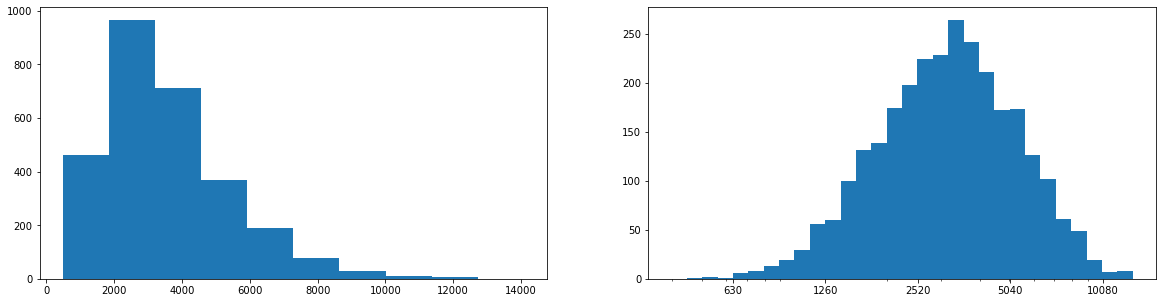

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(data=df, x='sales');
plt.subplot(1,2,2)
sales_bins=10**np.arange(2.6,4.1+0.05,0.05)
plt.hist(data=df, x='sales',bins=sales_bins)
plt.xscale('log')

ticks=[630,1260,2520,5040,10080]
labels=['{}'.format(x) for x in ticks]

plt.xticks(ticks,labels)
plt.show()

In [36]:
bins_max = np.log10(df.sales.max())
bin_min=np.log10(df.sales.min())
bins_trans = 10**np.linspace(2, bins_max, 50)

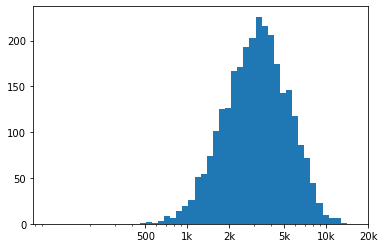

In [37]:
plt.hist(data=df, x='sales',bins=bins_trans)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);
#ticks=[630,1260,2520,5040,10080]
#labels=['{}'.format(x) for x in ticks]

#plt.xticks(ticks,labels)
plt.show()

In [38]:
3e4

30000.0

In [21]:
df

,order_number,quantity_ordered,price_each,cost_of_goods,order_line_number,sales,profit,order_date,status,product_line,msrp,product_code,customer_name,city,postal_code,country,deal_size,name
0,10223,37,100.00,3700.00,1,3965.66,265.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,Harmani Calderoni
1,10318,46,94.74,4358.04,1,4358.04,0.00,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,Harmani Calderoni
2,10210,34,100.00,3400.00,1,6123.40,2723.40,2004-12-01 00:00:00,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,Harmani Calderoni
3,10377,50,100.00,5000.00,1,5182.00,182.00,2005-09-02 00:00:00,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,Harmani Calderoni
4,10419,37,100.00,3700.00,1,5202.94,1502.94,5/17/2005 0:00,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,Harmani Calderoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10168,27,73.02,1971.54,18,1971.54,0.00,10/28/2003 0:00,Shipped,Planes,68,S24_3949,Technics Stores Inc.,Burlingame,94217,USA,Small,Theodore Drayers
2819,10159,42,51.48,2162.16,18,2162.16,0.00,2003-10-10 00:00:00,Shipped,Motorcycles,60,S18_2625,Corporate Gift Ideas Co.,San Francisco,NaN,USA,Small,Theodore Drayers
2820,10222,36,63.34,2280.24,18,2280.24,0.00,2/19/2004 0:00,Shipped,Ships,54,S72_3212,Collectable Mini Designs Co.,San Diego,91217,USA,Small,Theodore Drayers
2821,10165,31,71.10,2204.10,18,2204.10,0.00,10/22/2003 0:00,Shipped,Trucks and Buses,60,S18_2432,"Dragon Souveniers, Ltd.",Singapore,79903,Singapore,Small,Theodore Drayers


In [22]:
df.shape[0]

2823

In [23]:
abs(1 + 3.322 *np.log10(10))

4.322